# TensorFlow & Keras - Basics of Deep Learning

### Most importantly... resources

https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

## TF overview

* #### "End-to-end machine learning platform" 

    - Not the only one! Check out PyTorch, Theano, Cognitive Toolkit.
   
* #### Integrates with high-level APIs like Keras
* #### Plays nice with Pandas
* #### Makes deep learning *fast* and *easy* *
    *<sup>"easy"</sup>

## Tasks for TensorFlow:

* #### Regression
    - Predict house prices
    - Predict drug metabolic rates
    - Predict stock trends *
    
    *<sup>this is super hard</sup>
    
    

* #### Classification
    - Cat or dog?
    - Malignant or benign cancer from images
    ![](media/dr.png)
    <span style="font-size:0.75em;">Google AI Blog: Diabetic Retinopathy</span>



* #### Dimensionality reduction
    - Visualize high-dimensional data in 2 or 3-D space
    - Compress representations for successive ML



* #### Generative models
    - Create new molecules with desirable properties
    - Artificially enhance image resolution
    ![](media/molecular_gan.png)
    <span style="font-size:0.75em;">Kadurin et al., 2017</span>


* #### Reinforcement learning
    - Can't beat your friends at chess? Make your computer do it



* #### Much more...
    - Generic math
    - Probabilistic programming with TFP
    - Automatic differentiation
    - ...


## Let's Regress

### Imports!

In [1]:
import numpy as np
import pandas as pd

Name a more iconic duo, I'll wait

#### New imports -- TF and Keras

In [2]:
import keras
import tensorflow as tf

Using TensorFlow backend.


Check our versions for good measure -- these programs may have very different behavior version-to-version

In [3]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.13.1


#### Loading in housing data as with SKLearn

In [4]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [24]:
data["yr_built"].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [49]:
column_selection = ["bedrooms","bathrooms","sqft_living","sqft_lot",
                    "floors","condition","grade","sqft_above",
                    "sqft_basement","sqft_living15","sqft_lot15",
                    "lat", "long","yr_built","yr_renovated","waterfront"]

selected_feature = np.array(data[column_selection])
price = np.array(data["price"])
selected_feature_train = selected_feature[:20000]
price_train = price[:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

In [50]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

In [51]:
model = keras.Sequential()

In [52]:
input_len = len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))

In [53]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
history = model.fit(selected_feature_train, price_train,
                        epochs=50, batch_size=128)

Epoch 1/50
20000/20000 [==============================] - 1s 48us/step - loss: 362423227672.1664
Epoch 2/50
20000/20000 [==============================] - 0s 9us/step - loss: 241266003673.0880
Epoch 3/50
20000/20000 [==============================] - 0s 9us/step - loss: 104657655149.3632
Epoch 4/50
20000/20000 [==============================] - 0s 9us/step - loss: 76096611719.5776
Epoch 5/50
20000/20000 [==============================] - 0s 9us/step - loss: 74086634251.8784
Epoch 6/50
20000/20000 [==============================] - 0s 9us/step - loss: 72355529228.2880
Epoch 7/50
20000/20000 [==============================] - 0s 9us/step - loss: 70839192594.0224
Epoch 8/50
20000/20000 [==============================] - 0s 9us/step - loss: 69601997766.6560
Epoch 9/50
20000/20000 [==============================] - 0s 9us/step - loss: 68416932983.6032
Epoch 10/50
20000/20000 [==============================] - 0s 9us/step - loss: 67236469722.3168
Epoch 11/50
20000/20000 [====================

In [55]:
preds = model.predict(selected_feature_test)
score(preds, price_test)

0.49127404144950154

### Like SKLearn, it's easy to train and evaluate simple models.
#### ... but we should try to do better

## Practical Deep Learning -- What you need to know
### Train, Validation, Test:
   * Optimize parameters with Train (weights, biases)
   * Optimize hyperparameters with Validation (layer width & depth, activation functions, etc.)
   * Optimize NOTHING with Test

In [56]:
# Split out a validation set for hyperparameter optimization

selected_feature_train = selected_feature[:18000]
price_train = price[:18000]
selected_feature_val = selected_feature[18000:20000]
price_val = price[18000:20000]
selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

### Try a hyperparameter optimization:

### Try three activation functions to use for dense layers in the neural network above. Save the model that achieves the best validation loss 

#### Hint: [activation functions](http://letmegooglethat.com/?q=keras+activation+functions)

#### Hint: `model.fit` has argument "`validation_data`" which takes a tuple of features and targets

#### Hint: Use `model.save("filename.h5")` to save a model locally. If you want to use it later, just call `keras.models.load_model("filename.h5")`

In [57]:
# For easy looping, define neural network model as a function
def nn_model(optimizer='adam',
             activation='relu',
             layers=[20,20],
             loss='mean_squared_error'):
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(50, input_dim=input_len, activation=activ))
    model.add(keras.layers.Dense(50, activation=activ))
    model.add(keras.layers.Dense(1))

    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model

In [58]:
best_score = 1000.0 # bad

# loop over chosen activation functions, train, evaluate on validation
for activ in ['sigmoid', 'tanh', 'relu']:
    model = nn_model(activation=activ)

    history = model.fit(selected_feature_train, price_train,
                epochs=50, batch_size=128,
                validation_data=(selected_feature_val, price_val))
    model_score = score(model.predict(selected_feature_val), price_val)

    if model_score < best_score:
        best_score = model_score
        best_activ = activ
        best_model = model
        best_train = history

print(f"BEST ACTIVATION FUNCTION {best_activ} WITH SCORE {best_score}")
best_model.save("awesome_model.h5")


Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 1s 61us/step - loss: 532974.1758 - val_loss: 557914.6710
Epoch 2/50
18000/18000 [==============================] - 0s 15us/step - loss: 532967.3181 - val_loss: 557908.9735
Epoch 3/50
18000/18000 [==============================] - 0s 13us/step - loss: 532962.1269 - val_loss: 557903.9525
Epoch 4/50
18000/18000 [==============================] - 0s 14us/step - loss: 532957.2894 - val_loss: 557899.4930
Epoch 5/50
18000/18000 [==============================] - 0s 13us/step - loss: 532952.5633 - val_loss: 557894.6470
Epoch 6/50
18000/18000 [==============================] - 0s 9us/step - loss: 532947.9042 - val_loss: 557889.8510
Epoch 7/50
18000/18000 [==============================] - 0s 11us/step - loss: 532943.2878 - val_loss: 557885.5170
Epoch 8/50
18000/18000 [==============================] - 0s 10us/step - loss: 532938.6823 - val_loss: 557880.8320
Epoch 9/50
18000/18000 [========

Epoch 21/50
18000/18000 [==============================] - 0s 12us/step - loss: 532821.7987 - val_loss: 557762.6210
Epoch 22/50
18000/18000 [==============================] - 0s 12us/step - loss: 532814.5922 - val_loss: 557755.5335
Epoch 23/50
18000/18000 [==============================] - 0s 12us/step - loss: 532807.4018 - val_loss: 557747.9945
Epoch 24/50
18000/18000 [==============================] - 0s 12us/step - loss: 532800.2038 - val_loss: 557740.9595
Epoch 25/50
18000/18000 [==============================] - 0s 9us/step - loss: 532793.0068 - val_loss: 557733.7920
Epoch 26/50
18000/18000 [==============================] - 0s 9us/step - loss: 532785.8116 - val_loss: 557726.6450
Epoch 27/50
18000/18000 [==============================] - 0s 9us/step - loss: 532778.6256 - val_loss: 557719.5335
Epoch 28/50
18000/18000 [==============================] - 0s 9us/step - loss: 532771.4330 - val_loss: 557712.0170
Epoch 29/50
18000/18000 [==============================] - 0s 9us/step - los

### Visualize your training:

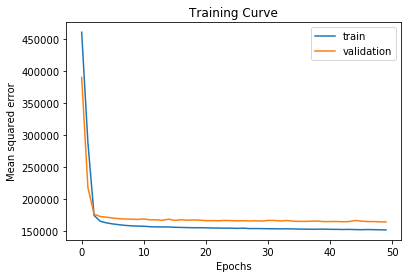

In [59]:
import matplotlib.pyplot as plt

# plot loss during training
def plot_loss(hist):
    %matplotlib inline
    plt.title('Training Curve')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.xlabel("Epochs")
    plt.ylabel("Mean squared error")
    plt.legend()
    plt.show()

plot_loss(best_train)

#### In the future, try better validation schemes like [k-fold cross validation](https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/), though 80/20 or 90/10 train/val like this works in a pinch

### Standardize your features:
* Typically assumes normally distributed feature, shifting mean to 0 and standard deviation to 1
* In theory does not matter for neural networks
* In practice tends to matter for neural networks
* Scale if using:
    - Logistic regression
    - Support vector machines
    - Perceptrons
    - Neural networks
    - Principle component analysis
* Don't bother if using:
    - "Forest" methods
    - Naive Bayes

In [60]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
in_scaler = StandardScaler()

# Fit scaler to the training set and perform the transformation
selected_feature_train = in_scaler.fit_transform(selected_feature_train)

# Use the fitted scaler to transform validation and test features
selected_feature_val = in_scaler.transform(selected_feature_val)
selected_feature_test = in_scaler.transform(selected_feature_test)

# Check appropriate scaling
print(np.mean(selected_feature_train[:,0]))
print(np.std(selected_feature_train[:,0]))

print(np.mean(selected_feature_val[:,0]))
print(np.std(selected_feature_val[:,0]))

print(np.mean(selected_feature_test[:,0]))
print(np.std(selected_feature_test[:,0]))

-9.158106372019069e-17
1.0
0.016119707489855875
0.9970087526331801
0.09330835574898895
0.9414925643047213


Train on 18000 samples, validate on 2000 samples
Epoch 1/200
18000/18000 [==============================] - 1s 69us/step - loss: 416644724774.2293 - val_loss: 456240251273.2160
Epoch 2/200
18000/18000 [==============================] - 0s 14us/step - loss: 416219411047.3102 - val_loss: 455230525276.1600
Epoch 3/200
18000/18000 [==============================] - 0s 16us/step - loss: 414539373463.3245 - val_loss: 452292457267.2000
Epoch 4/200
18000/18000 [==============================] - 0s 14us/step - loss: 410731792826.3680 - val_loss: 446517339226.1120
Epoch 5/200
18000/18000 [==============================] - 0s 12us/step - loss: 403953550943.1182 - val_loss: 437057174896.6400
Epoch 6/200
18000/18000 [==============================] - 0s 11us/step - loss: 393657770544.6969 - val_loss: 423509280423.9360
Epoch 7/200
18000/18000 [==============================] - 0s 11us/step - loss: 379580761156.2667 - val_loss: 405581878001.6640
Epoch 8/200
18000/18000 [==============================

Epoch 65/200
18000/18000 [==============================] - 0s 10us/step - loss: 43967003383.1253 - val_loss: 48120822792.1920
Epoch 66/200
18000/18000 [==============================] - ETA: 0s - loss: 43677351207.822 - 0s 10us/step - loss: 43358731547.0791 - val_loss: 47560437465.0880
Epoch 67/200
18000/18000 [==============================] - 0s 10us/step - loss: 42763919989.8738 - val_loss: 47031392337.9200
Epoch 68/200
18000/18000 [==============================] - 0s 12us/step - loss: 42186531049.0169 - val_loss: 46524311076.8640
Epoch 69/200
18000/18000 [==============================] - 0s 12us/step - loss: 41641749632.3413 - val_loss: 46035936804.8640
Epoch 70/200
18000/18000 [==============================] - 0s 12us/step - loss: 41131274274.5884 - val_loss: 45590292496.3840
Epoch 71/200
18000/18000 [==============================] - 0s 13us/step - loss: 40640540990.5778 - val_loss: 45200045047.8080
Epoch 72/200
18000/18000 [==============================] - 0s 13us/step - lo

18000/18000 [==============================] - 0s 13us/step - loss: 33579016670.7769 - val_loss: 39000030150.6560
Epoch 130/200
18000/18000 [==============================] - 0s 12us/step - loss: 33535163312.8107 - val_loss: 38973689102.3360
Epoch 131/200
18000/18000 [==============================] - 0s 12us/step - loss: 33492335205.4898 - val_loss: 38930244927.4880
Epoch 132/200
18000/18000 [==============================] - 0s 12us/step - loss: 33455017304.9742 - val_loss: 38909504585.7280
Epoch 133/200
18000/18000 [==============================] - 0s 12us/step - loss: 33410613950.6916 - val_loss: 38849598160.8960
Epoch 134/200
18000/18000 [==============================] - 0s 12us/step - loss: 33375177029.8596 - val_loss: 38805699493.8880
Epoch 135/200
18000/18000 [==============================] - 0s 13us/step - loss: 33335135123.6836 - val_loss: 38765521666.0480
Epoch 136/200
18000/18000 [==============================] - 0s 13us/step - loss: 33302001097.8418 - val_loss: 3873150

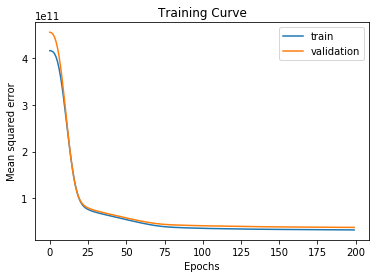

In [61]:
model = nn_model()

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=200, batch_size=128,
            validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_val), price_val)
print(model_score)

plot_loss(history)

#### In the future, consider standardizing outputs as well

### Regularize:
* Heavily parameterized models like neural networks are prone to overfitting
* Popular off-the-shelf tools exist to regularize models and prevent overfitting:
    - L2 regularization (weight decay)
    - Dropout
    - Batch normalization
    
#### These tools come as standard Keras/TF layers!
`model.add(keras.layers.Dropout(rate)`
`model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)`
`model.add(keras.layers.BatchNormalization())`

### Early stopping and model checkpointing:
#### It's unlikely the last iteration is the best, and who knows how long until the thing is converged. Just grab the best validation error.

Train on 18000 samples, validate on 2000 samples
Epoch 1/400
18000/18000 [==============================] - 1s 74us/step - loss: 416642251358.2080 - val_loss: 456230491127.8080

Epoch 00001: val_loss improved from inf to 456230491127.80798, saving model to best_model.h5
Epoch 2/400
18000/18000 [==============================] - 0s 12us/step - loss: 416175593648.5831 - val_loss: 455115510906.8800

Epoch 00002: val_loss improved from 456230491127.80798 to 455115510906.88000, saving model to best_model.h5
Epoch 3/400
18000/18000 [==============================] - 0s 11us/step - loss: 414236468168.4764 - val_loss: 451725259702.2720

Epoch 00003: val_loss improved from 455115510906.88000 to 451725259702.27197, saving model to best_model.h5
Epoch 4/400
18000/18000 [==============================] - 0s 12us/step - loss: 409652313427.5129 - val_loss: 444793102532.6080

Epoch 00004: val_loss improved from 451725259702.27197 to 444793102532.60797, saving model to best_model.h5
Epoch 5/400
18000/


Epoch 00035: val_loss improved from 68379734900.73600 to 67542714089.47200, saving model to best_model.h5
Epoch 36/400
18000/18000 [==============================] - 0s 11us/step - loss: 63058047835.2498 - val_loss: 66706866110.4640

Epoch 00036: val_loss improved from 67542714089.47200 to 66706866110.46400, saving model to best_model.h5
Epoch 37/400
18000/18000 [==============================] - 0s 11us/step - loss: 62235788523.7476 - val_loss: 65874906316.8000

Epoch 00037: val_loss improved from 66706866110.46400 to 65874906316.80000, saving model to best_model.h5
Epoch 38/400
18000/18000 [==============================] - 0s 9us/step - loss: 61422055413.0773 - val_loss: 65048028676.0960

Epoch 00038: val_loss improved from 65874906316.80000 to 65048028676.09600, saving model to best_model.h5
Epoch 39/400
18000/18000 [==============================] - 0s 10us/step - loss: 60599847682.0480 - val_loss: 64214742892.5440

Epoch 00039: val_loss improved from 65048028676.09600 to 6421474

Epoch 71/400
18000/18000 [==============================] - 0s 12us/step - loss: 39018746580.5369 - val_loss: 44027694514.1760

Epoch 00071: val_loss improved from 44217486540.80000 to 44027694514.17600, saving model to best_model.h5
Epoch 72/400
18000/18000 [==============================] - 0s 12us/step - loss: 38775277986.7022 - val_loss: 43818001956.8640

Epoch 00072: val_loss improved from 44027694514.17600 to 43818001956.86400, saving model to best_model.h5
Epoch 73/400
18000/18000 [==============================] - 0s 11us/step - loss: 38536078988.6293 - val_loss: 43646061936.6400

Epoch 00073: val_loss improved from 43818001956.86400 to 43646061936.64000, saving model to best_model.h5
Epoch 74/400
18000/18000 [==============================] - 0s 12us/step - loss: 38323034567.1111 - val_loss: 43454754029.5680

Epoch 00074: val_loss improved from 43646061936.64000 to 43454754029.56800, saving model to best_model.h5
Epoch 75/400
18000/18000 [==============================] - 0s 1

18000/18000 [==============================] - 0s 12us/step - loss: 34409279844.8071 - val_loss: 39797475049.4720

Epoch 00106: val_loss improved from 39880520302.59200 to 39797475049.47200, saving model to best_model.h5
Epoch 107/400
18000/18000 [==============================] - 0s 11us/step - loss: 34347008436.9067 - val_loss: 39678428577.7920

Epoch 00107: val_loss improved from 39797475049.47200 to 39678428577.79200, saving model to best_model.h5
Epoch 108/400
18000/18000 [==============================] - 0s 11us/step - loss: 34287083181.3973 - val_loss: 39658844979.2000

Epoch 00108: val_loss improved from 39678428577.79200 to 39658844979.20000, saving model to best_model.h5
Epoch 109/400
18000/18000 [==============================] - 0s 11us/step - loss: 34224641645.6818 - val_loss: 39636056375.2960

Epoch 00109: val_loss improved from 39658844979.20000 to 39636056375.29600, saving model to best_model.h5
Epoch 110/400
18000/18000 [==============================] - 0s 11us/step 

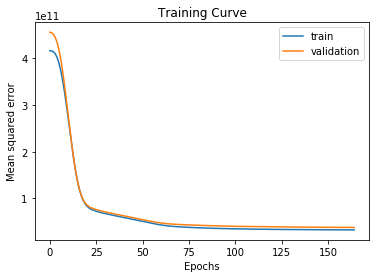

In [62]:
# Set callback functions to early stop training and save the 
# best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
            ModelCheckpoint(filepath='best_model.h5',
                            monitor='val_loss',
                            save_best_only=True,
                           verbose=1)]

model = nn_model(layers=[20,20,20])

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=400, callbacks=callbacks, batch_size=128,
            validation_data=(selected_feature_val, price_val))

model_score = score(model.predict(selected_feature_val), price_val)
print(f"Model score: {model_score}")
plot_loss(history)

### You don't have to remember these resources because they're here when you need them
https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

### Don't trust me, trust your validation errors
### Don't look at your test set until you're actually going to test